In [1]:
#pip install PyPortfolioOpt
#pip install cvxopt
#pip install cvxpy

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns
sns.set()
import scipy.optimize as sco

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import objective_functions

In [3]:
start = '2015-01-01'
end = '2022-12-31'

In [4]:
gold_df = yf.download('GLD',start,end)
com_df = yf.download('GSG',start,end)
bonds_df = yf.download('VBMFX',start,end)
equity_df = yf.download('SPY',start,end)
coin_df = yf.download('BTC-USD',start,end)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [5]:
df = pd.DataFrame()

In [6]:
df['gold'] = gold_df['Close']
df['com'] = com_df['Close']
df['bond'] = bonds_df['Close']
df['equity'] = equity_df['Close']
df['bitcoin'] = coin_df['Close']

In [7]:
df

,gold,com,bond,equity,bitcoin
Date,,,,,
2015-01-02,114.080002,21.219999,10.90,205.429993,315.032013
2015-01-05,115.800003,20.620001,10.93,201.720001,274.473999
2015-01-06,117.120003,20.280001,10.97,199.820007,286.188995
2015-01-07,116.430000,20.219999,10.97,202.309998,294.337006
2015-01-08,115.940002,20.290001,10.94,205.899994,283.348999
...,...,...,...,...,...
2022-12-23,167.259995,21.090000,9.56,382.910004,16796.953125
2022-12-27,168.669998,21.240000,9.50,381.399994,16717.173828
2022-12-28,167.910004,21.040001,9.48,376.660004,16552.572266


In [8]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

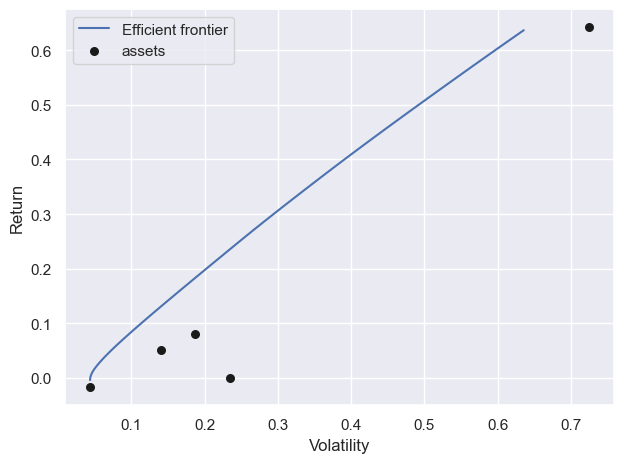

Expected annual return: 48.1%
Annual volatility: 47.3%
Sharpe Ratio: 0.98


(0.48122329882359766, 0.4729333079192483, 0.9752396185686923)

In [9]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

for name in list(df.columns):
    ef.add_constraint(lambda w: w[ef.tickers.index(name)] <= 0.8) 
        
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef.deepcopy(), ax=ax,show_assets=True)
plt.show()
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)